<a href="https://colab.research.google.com/github/nisha432/mobile-price-range/blob/main/Copy_of_Nisha_mobile_price_range_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    -Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**NISHA AHIRE


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the highly competitive mobile phone market, understanding the sales data of mobile phones and identifying the factors that drive their prices is crucial for companies. The objective of this project is to establish relationships between various features of a mobile phone, such as RAM, internal memory, and more, and their corresponding selling prices. Rather than predicting the exact price, the focus is on determining a price range that indicates the relative affordability or high-end nature of the device.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal
import matplotlib.patheffects as path_effects
import datetime
import missingno as msno

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError
from sklearn.preprocessing import label_binarize

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn import datasets
from itertools import cycle


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz
from yellowbrick.style import set_palette
set_palette('flatui')

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552496 sha256=b66d7eb8563b32953a4411fc47c9058c4626bd5282b57e0fff8051c672565468
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
price_df=pd.read_csv("/content/drive/MyDrive/data_mobile_price_range.csv")

### Dataset First View

In [5]:
# Dataset First Look

In [6]:
price_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count

In [8]:
price_df.shape

(2000, 21)

### Dataset Information

In [9]:
# Dataset Info
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

1. this dataset i assume is not from the 2020 phone because by just looking at the battery power there's no phone above 2000 MAH
2. there's probaby an outlier in fc column (front camera mega pixel by looking the min and max value ) need more investigation 
3. there's a phone without front camera in this dataset, might be a good insight to bin in 
4. we could get a screen size by getting diagonal of phone screen height and width 
5. the maximum ram in this phone is almost 4000 mb (4GB), this could be a good insight if we bin it properly
6. the maximum core for this phone dataset is 8 cores (octacores) and the minimum is a single core phone (1 core)
7. the heaviset phone is 200 gram which is normal for phone these days 
8.  we can group the phone by screen quality by using px_height, px_weight
9. there's a row with 0 pixel height which is unusual not to have pixel height in a phone
10. there's also an usual row value of 0 in screen width, it doesn't make sense that a phone has 0 width

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count

In [11]:
# Find duplicate rows based on all columns
duplicates = price_df[price_df.duplicated()]

# Print the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
price_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
# Visualizing the missing values

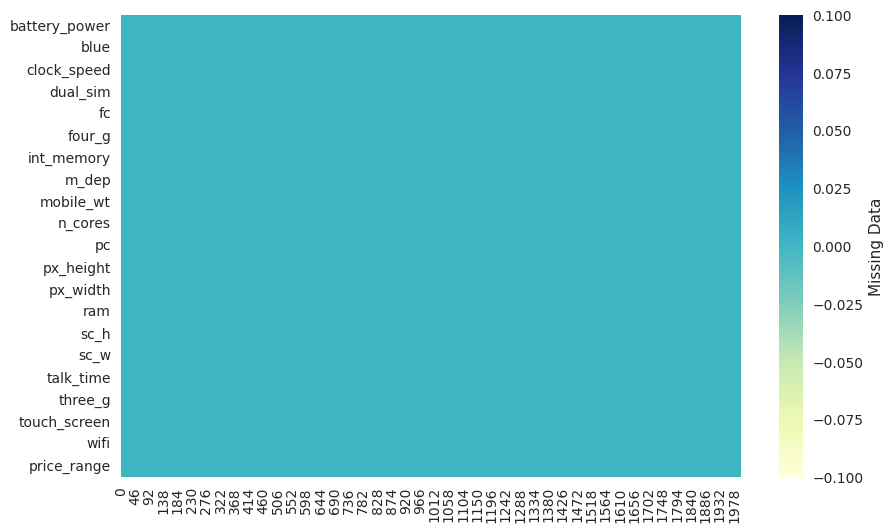

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(price_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

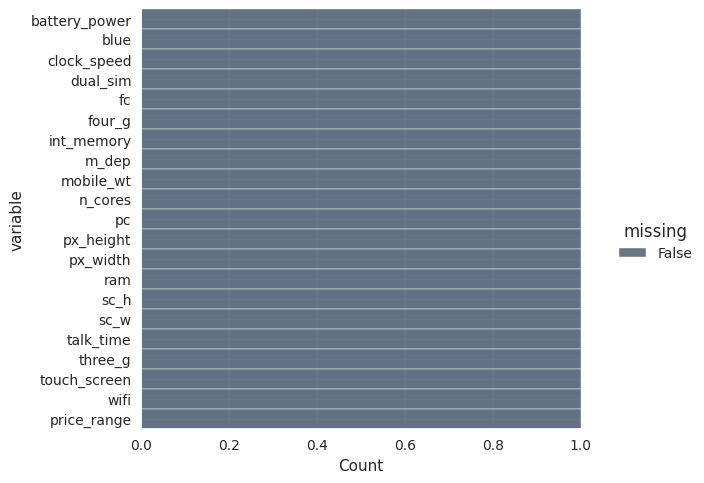

In [15]:
plt.figure(figsize=(10,6))
sns.displot(
    data=price_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### What did you know about your dataset?

the following dataset has no missing value.

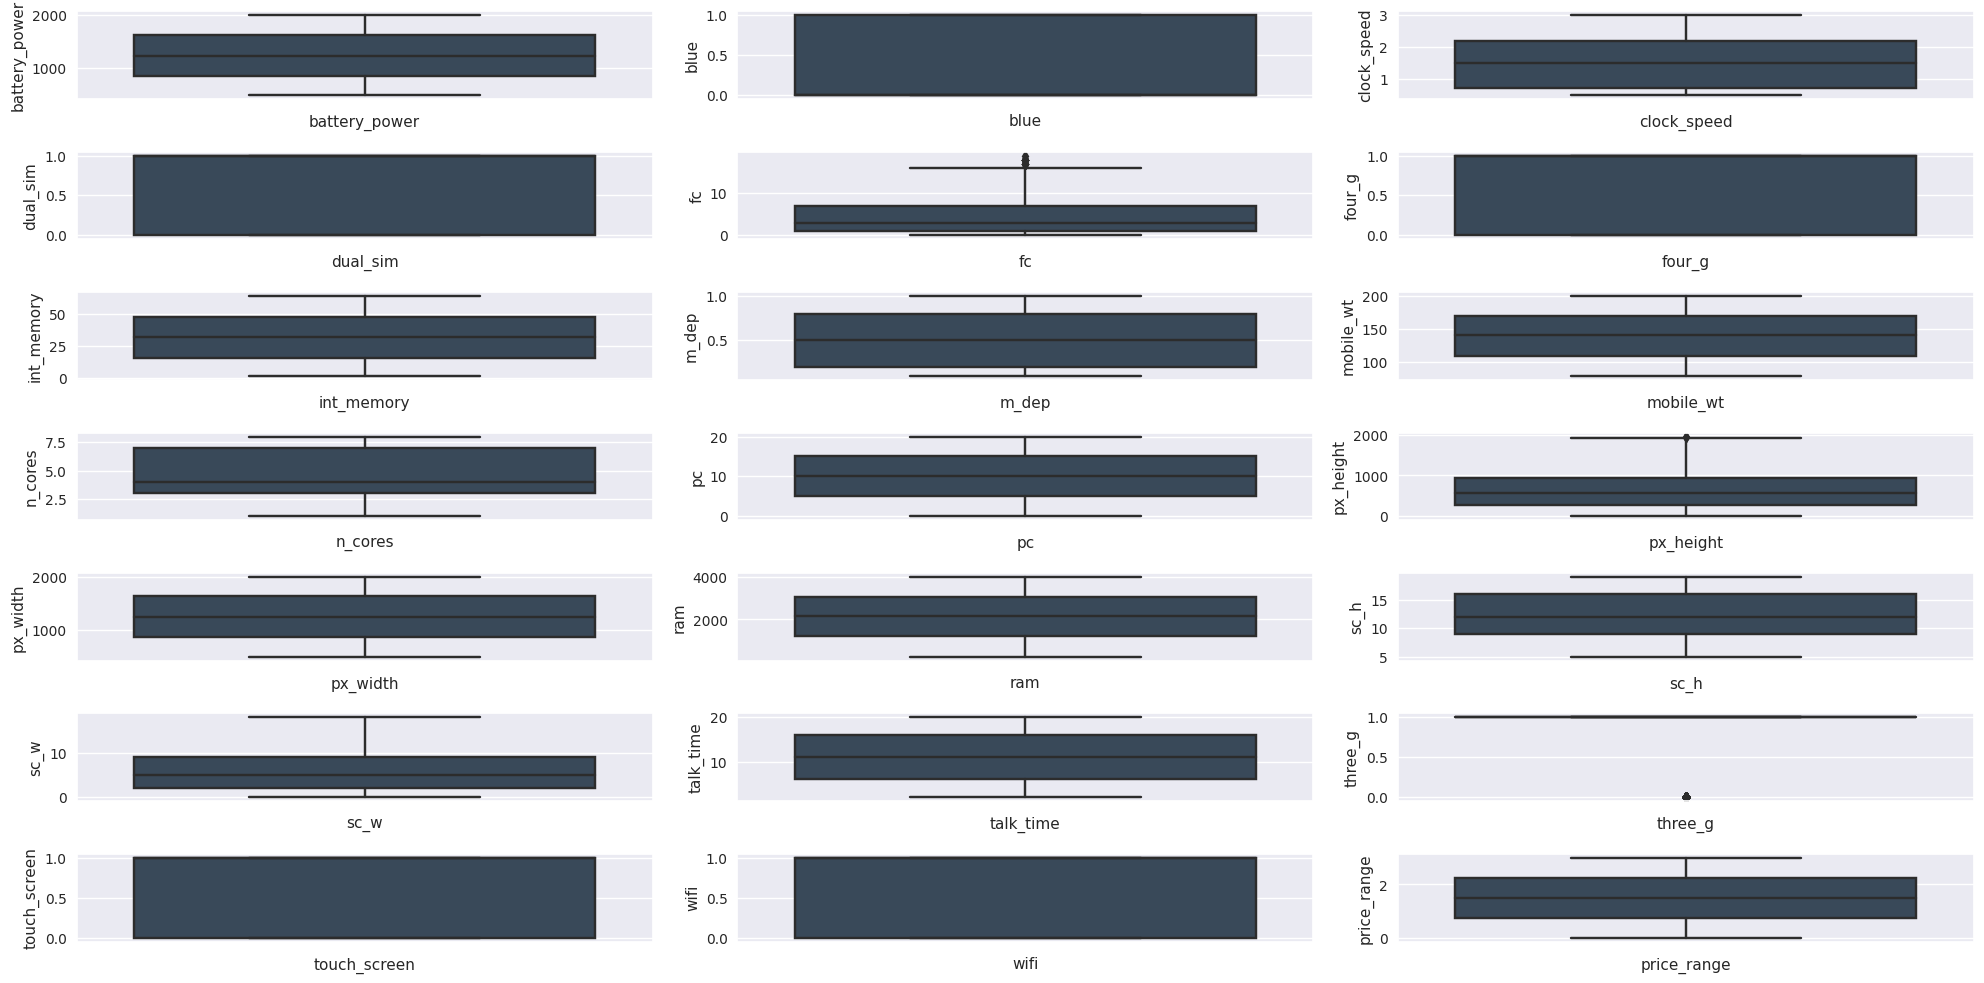

In [16]:
## outlier checking with a box plot 
plt.figure(figsize=(20, 10))
columns = price_df.columns
num_plots = len(columns)
rows = num_plots // 3 + (num_plots % 3 > 0)

for i, column in enumerate(columns):
    plt.subplot(rows, 3, i+1)
    sns.boxplot(y=price_df[column])
    plt.xlabel(column)
    plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()

#

 as i mentioned before above there's probably an outliers in fc column and we found some outliers there, there are also and outliers in the px height columns  

In [17]:
## getting the number of the outliers in fc column

price_df_description = price_df.describe()
fc_Q1 =  price_df_description['fc']['25%']
fc_Q3 = price_df_description['fc']['75%']
fc_IQR = fc_Q3 - fc_Q1

up_fence = fc_Q3 + (1.5 * fc_IQR)
lo_Fence = fc_Q1 - (1.5 * fc_IQR)

fc_outliers =  price_df[(price_df['fc'] < lo_Fence) | (price_df['fc']> up_fence)]
fc_outliers

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [18]:
px_height_Q1 =  price_df_description['px_height']['25%']
px_height_Q3 =price_df_description['px_height']['75%']
px_height_IQR = px_height_Q3 - px_height_Q1

up_fence_px_height = px_height_Q3 + (1.5 * px_height_IQR)
lo_Fence_px_height = px_height_Q1 - (1.5 * px_height_IQR)

px_height_outliers =  price_df[(price_df['px_height'] < lo_Fence_px_height) | (price_df['px_height']> up_fence_px_height)]
px_height_outliers


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,...,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,...,1960,1963,1622,18,17,16,1,1,1,2


In [19]:
# total_number of outliers 

total_outliers = len(fc_outliers) + len(px_height_outliers)
print(f"total outliers of fc : {len(fc_outliers)}")
print(f"total outliers of px_height: {len(px_height_outliers)}" )
print(f"total percentage of outliers: {round((total_outliers / len(price_df))*100,2)}%")

total outliers of fc : 18
total outliers of px_height: 2
total percentage of outliers: 1.0%


there are 18 phone that has a front camera outlier value 

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [21]:
# Dataset Describe

In [22]:
price_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description 

The variable description is mentioned below.

Data Description -

1. Battery_power - Total energy a battery can store in one time measured in mAh

2. Blue - Has bluetooth or not

3. Clock_speed - speed at which microprocessor executes instructions

4. Dual_sim - Has dual sim support or not

5. Fc - Front Camera mega pixels

6. Four_g - Has 4G or not

7. Int_memory - Internal Memory in Gigabytes

8. M_dep - Mobile Depth in cm

9. Mobile_wt - Weight of mobile phone

10. N_cores - Number of cores of processor

11. Px_height - Pixel Resolution Height

12. Px_width - Pixel Resolution Width

13. Ram - Random Access Memory in Mega

14. Touch_screen - Has touch screen or not

15. Wifi - Has wifi or not

16. Sc_h - Screen Height of mobile in cm

17. Sc_w - Screen Width of mobile in cm

18. Talk_time - longest time that a single battery charge will last 

19. Three_g - Has 3G or not

20. Wifi - Has wifi or not

21. Price_range - price ranges of mobiles .This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).





### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for column in price_df.columns:
    unique_values = price_df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

Unique values in battery_power column: [ 842 1021  563 ... 1139 1467  858]
Unique values in blue column: [0 1]
Unique values in clock_speed column: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values in dual_sim column: [0 1]
Unique values in fc column: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values in four_g column: [0 1]
Unique values in int_memory column: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values in m_dep column: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values in mobile_wt column: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116 

In [25]:
# Checking the number of unique values for each column in the dataset
price_df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.

In [27]:
price_df1=price_df.copy()

In [28]:
price_df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [29]:
price_df1.shape

(2000, 21)

### What all manipulations have you done and insights you found?

the given dataset doesnt had missing values,but they had inconsistencies and outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [30]:
# Chart - 1 visualization code

In [31]:
# Count the occurrences of each price range
price_counts = price_df1['price_range'].value_counts()
price_counts


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

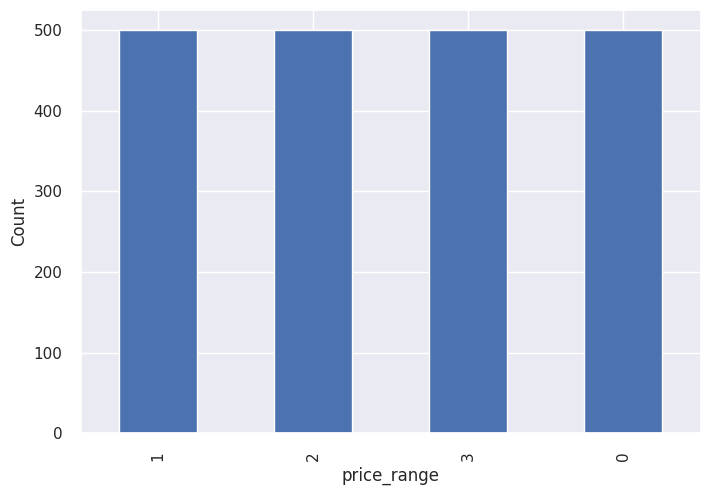

In [32]:
# Plot the distribution of price ranges
sns.set()
price_plot=price_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()
     

##### 1. Why did you pick the specific chart?

i have selected this graph to examine the distribution of the target variable, i.e., the price range, and determine if there is any class imbalance.

##### 2. What is/are the insight(s) found from the chart?

By analyzing the bar graph, it becomes easier to determine that the   price ranges are evenly distributed and  there not an  imbalance in the distribution. 
There are mobile phones in 4 price ranges. The number of elements is almost 
similar.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The analysis of the bar graph indicates that the price ranges are evenly distributed, with a similar number of mobile phones in each range. These insights can have a positive business impact by allowing for targeted market coverage, balanced pricing strategies, and tailored product development. There are no specific insights suggesting negative growth. However, it's important to consider other factors and market dynamics to ensure continued growth and competitiveness.

#### Chart - 2

In [33]:
# Chart - 2 visualization code

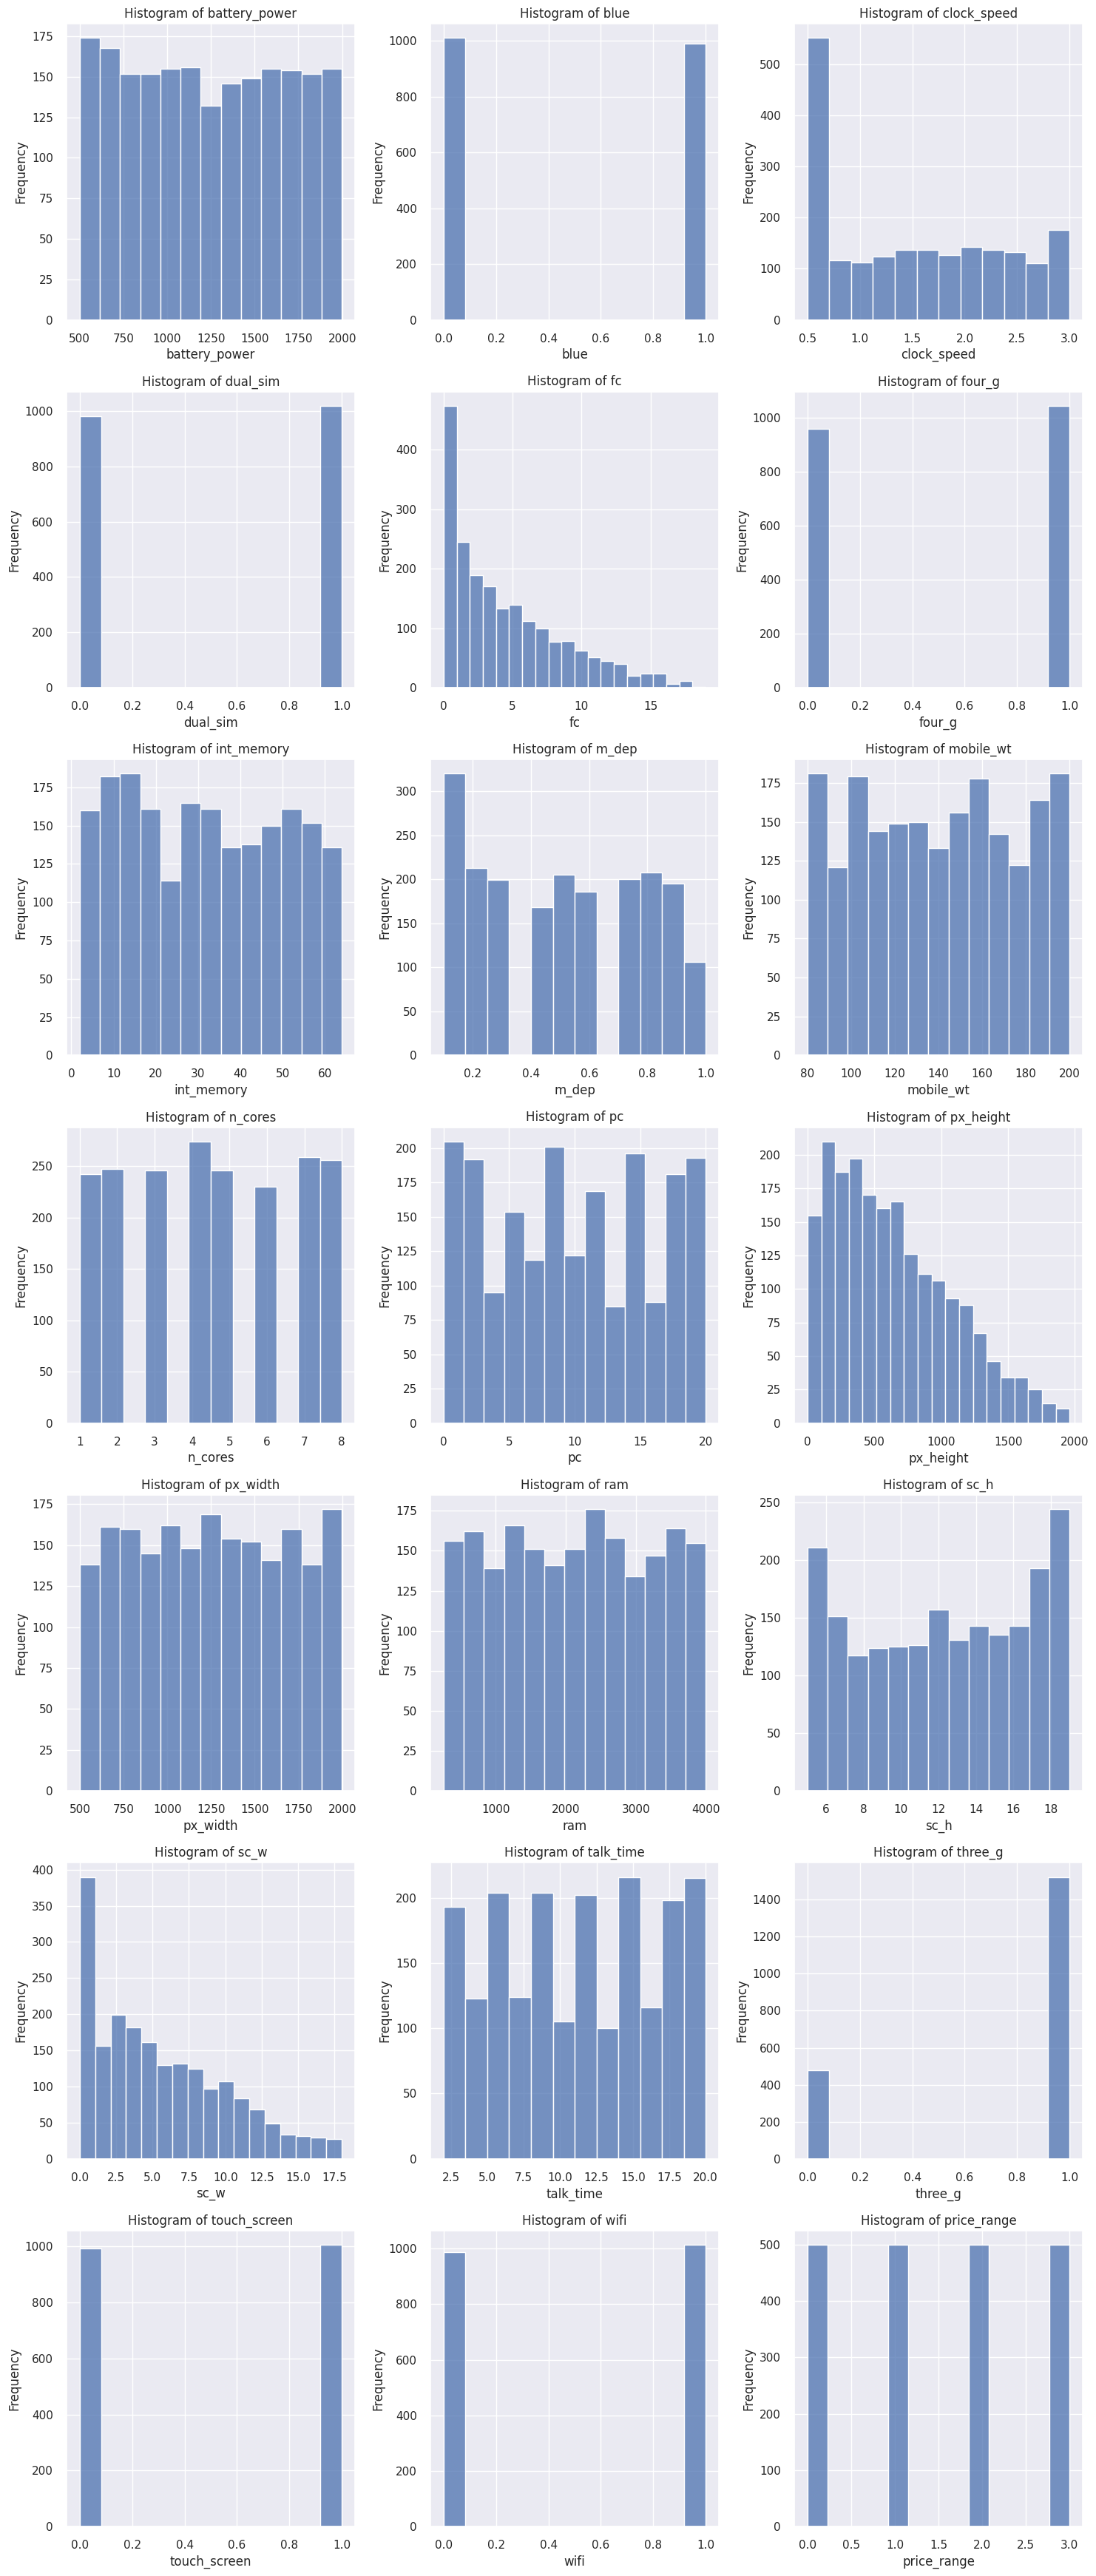

In [34]:
# Set the figure size
sns.set(rc={'figure.figsize': (15, 5)})

# Set the number of columns for subplots
num_cols = 3

# Set the number of rows based on the number of columns
num_rows = (len(price_df.columns) - 1) // num_cols + 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate over the columns and generate histograms
for i, column in enumerate(price_df.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    sns.histplot(price_df[column], ax=ax)
    ax.set(xlabel=column, ylabel='Frequency')
    ax.set_title(f'Histogram of {column}')

# Hide any unused subplots
if len(price_df.columns) < num_rows * num_cols:
    for j in range(len(price_df.columns), num_rows * num_cols):
        row = j // num_cols
        col = j % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()


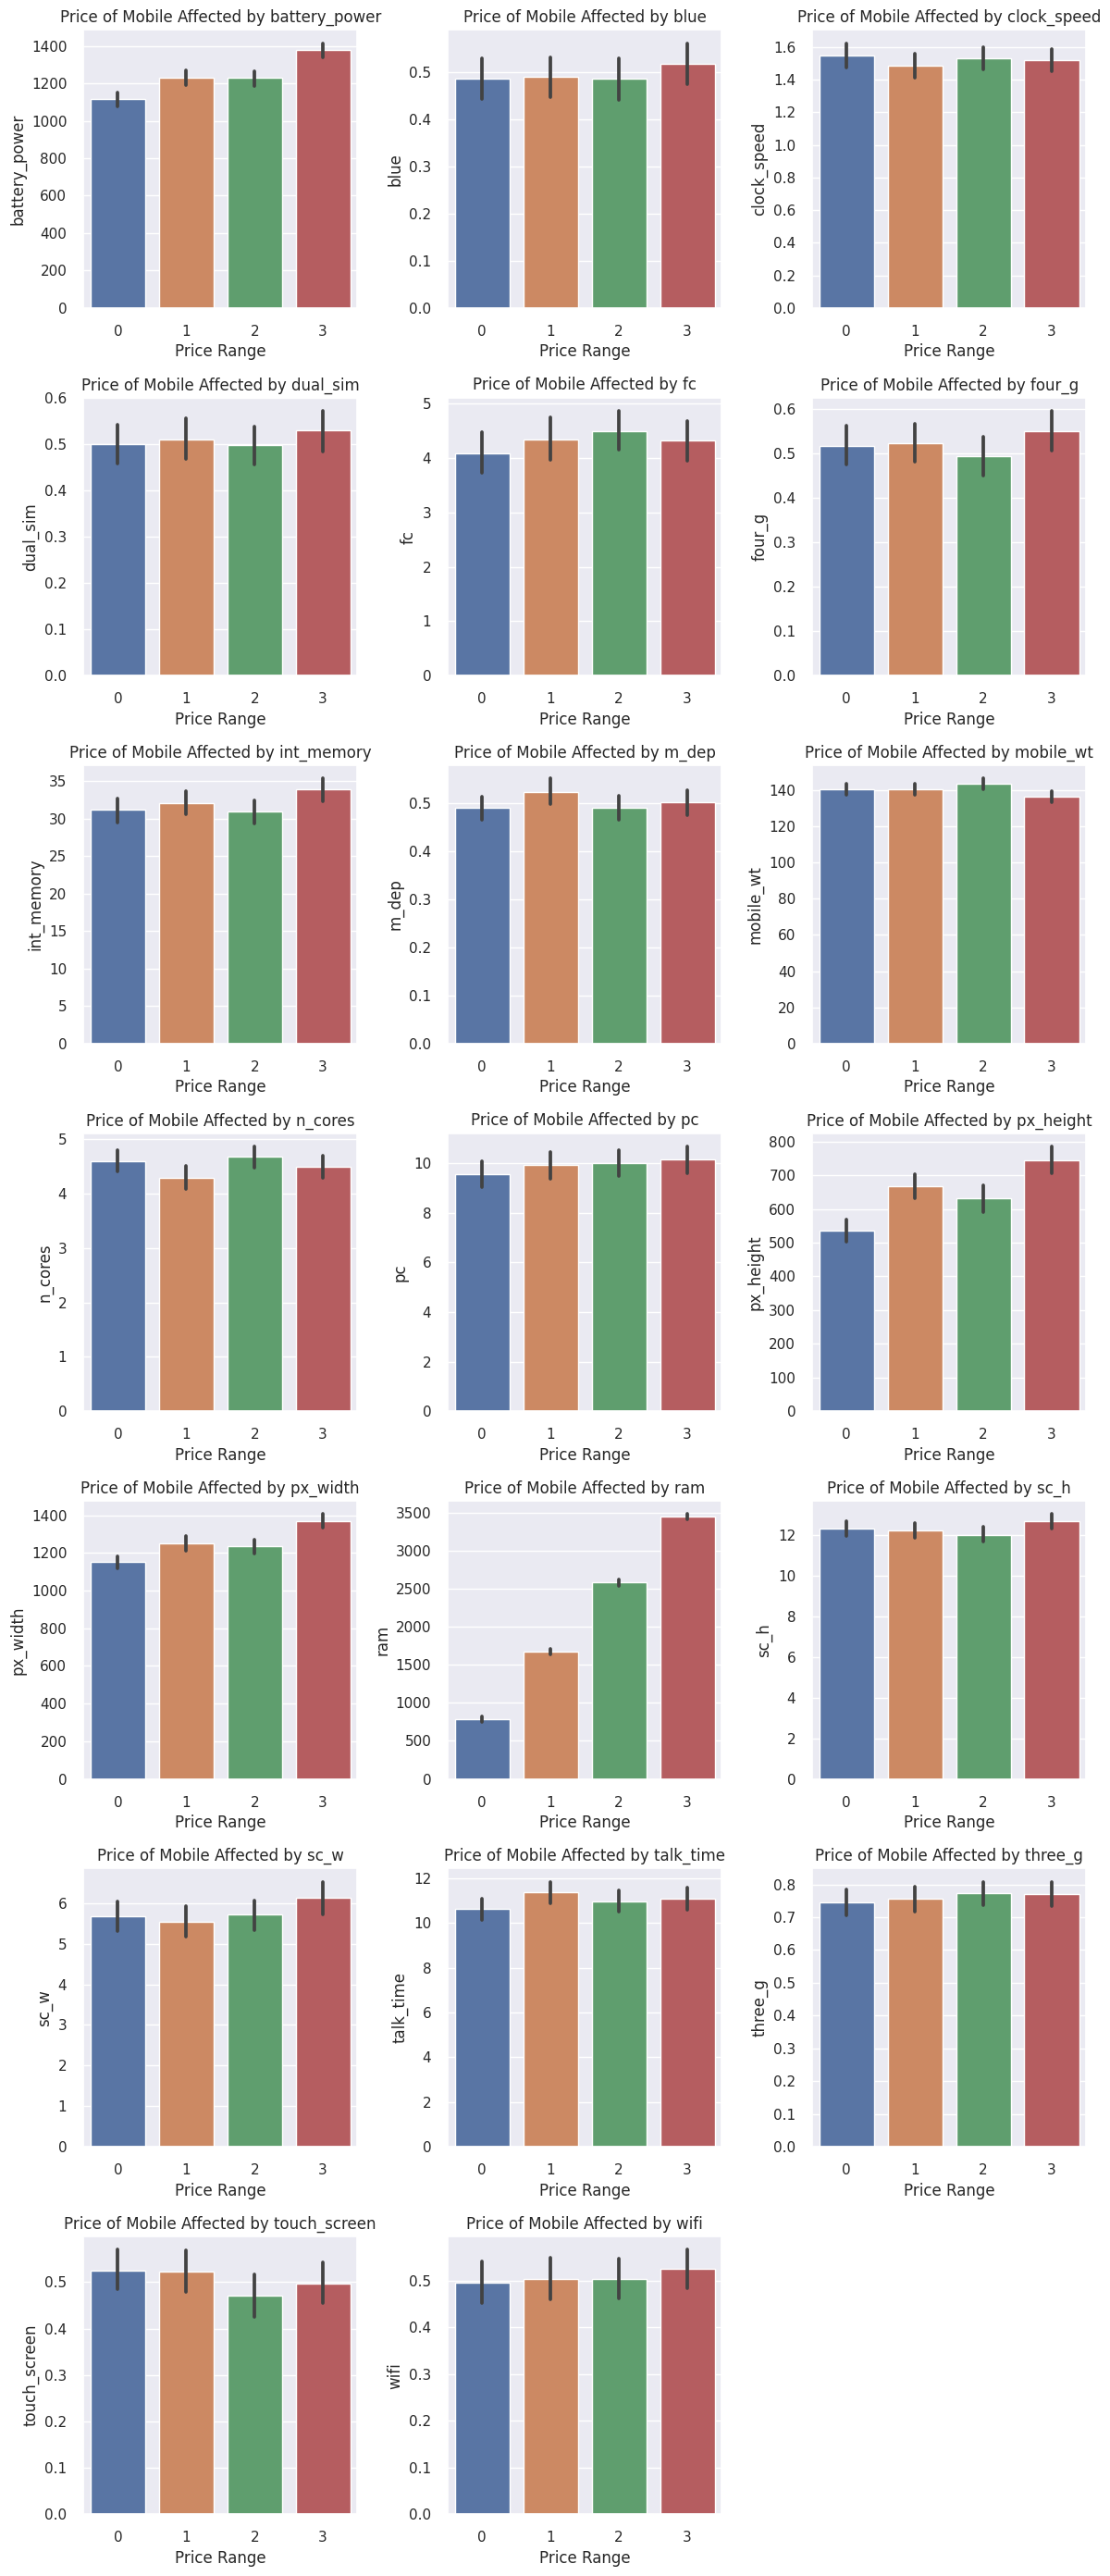

In [35]:



# Define the columns to analyze (excluding the target variable)
columns = price_df.columns.drop('price_range')

# Set the number of rows and columns for subplots
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate over the columns and generate bar plots
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    sns.barplot(data=price_df, x='price_range', y=column, ax=ax)
    ax.set(xlabel='Price Range', ylabel=column)
    ax.set_title(f'Price of Mobile Affected by {column}')

# Hide any unused subplots
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        row = j // num_cols
        col = j % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

this plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [36]:
# Chart - 3 visualization code

In [37]:
price_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

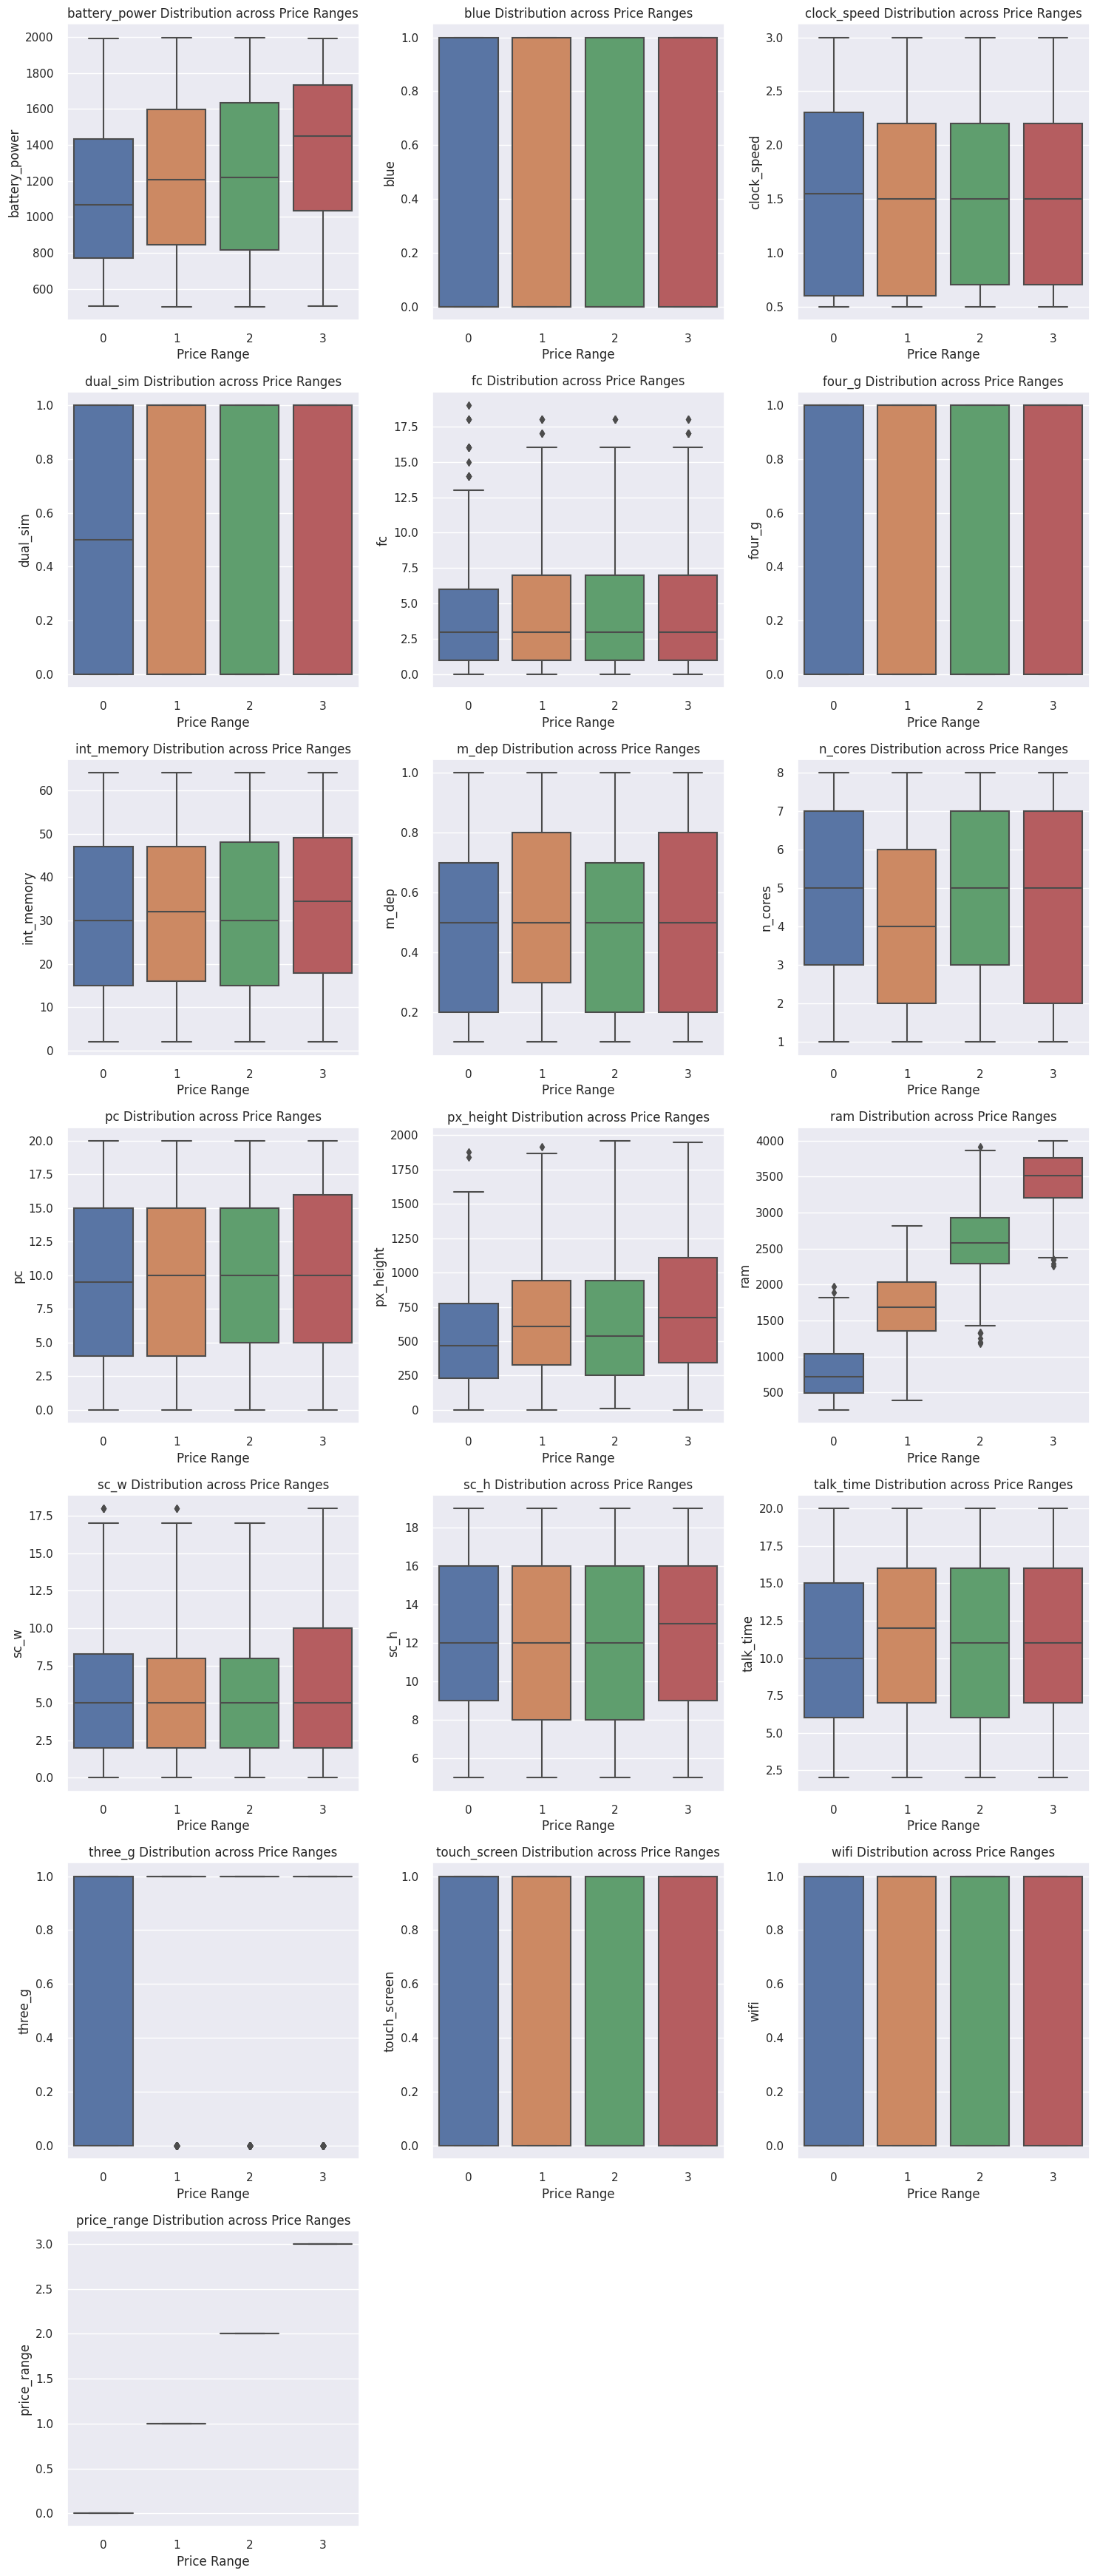

In [38]:
# Select the relevant columns for analysis
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'n_cores', 'pc', 'px_height', 'ram', 'sc_w','sc_h',
            'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Create box plots for each feature grouped by price range
num_plots = len(features)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]
    sns.boxplot(x='price_range', y=feature, data=price_df, ax=ax)
    ax.set(xlabel='Price Range', ylabel=feature)
    ax.set_title(f'{feature} Distribution across Price Ranges')

# Hide any unused subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        row = j // num_cols
        col = j % num_cols
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [39]:
# Chart - 4 visualization code

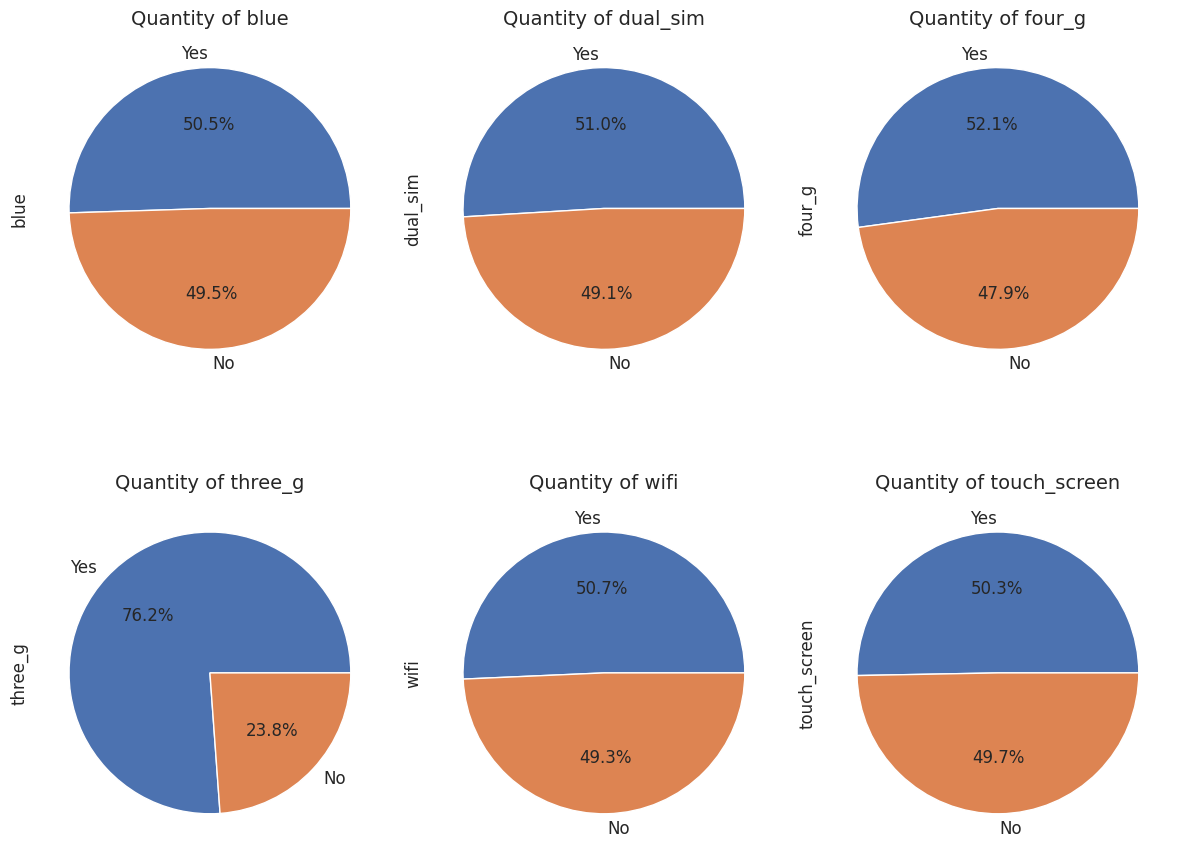

In [40]:
plt.figure(figsize=(15, 10))

rows = 2
cols = 3
count = 1
var_list = ['blue', 'dual_sim', 'four_g', 'three_g', 'wifi', 'touch_screen']
labels = ['Yes', 'No']

for var in var_list:
    plt.subplot(rows, cols, count)
    price_df[var].value_counts().plot.pie(autopct='%1.1f%%', fontsize=12, figsize=(12, 10), labels=labels)
    plt.title(f'Quantity of {var}', fontsize=14)
    count += 1

plt.tight_layout()
plt.show()


SO BY ABOVE OBSERVATION WE GET TO KNOW THAT FOLLOWING FEATURES ABOVE HAVE ALMOST EQUAL WEIGHTAGE OF PERCENTAGE THAT IT PRESENT IN A PARTICULAR MOBILE OR NOT.BUT SOME FEATURES HAVE HIGH WEIGHTAGE IN THE MOBILES.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [41]:
# Chart - 5 visualization code

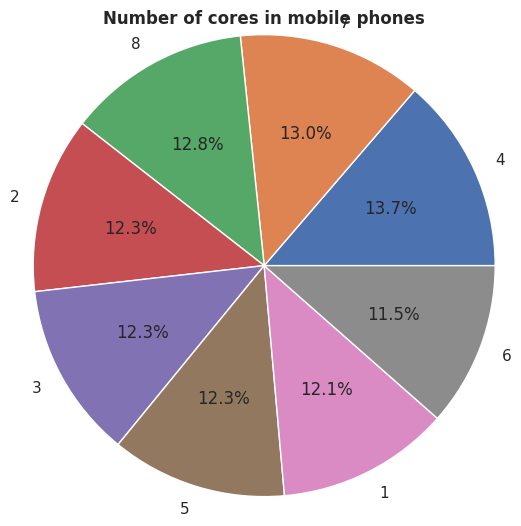

In [42]:
n_cores = price_df['n_cores'].value_counts()
plt.title('Number of cores in mobile phones\n\n', weight='bold')
n_cores.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

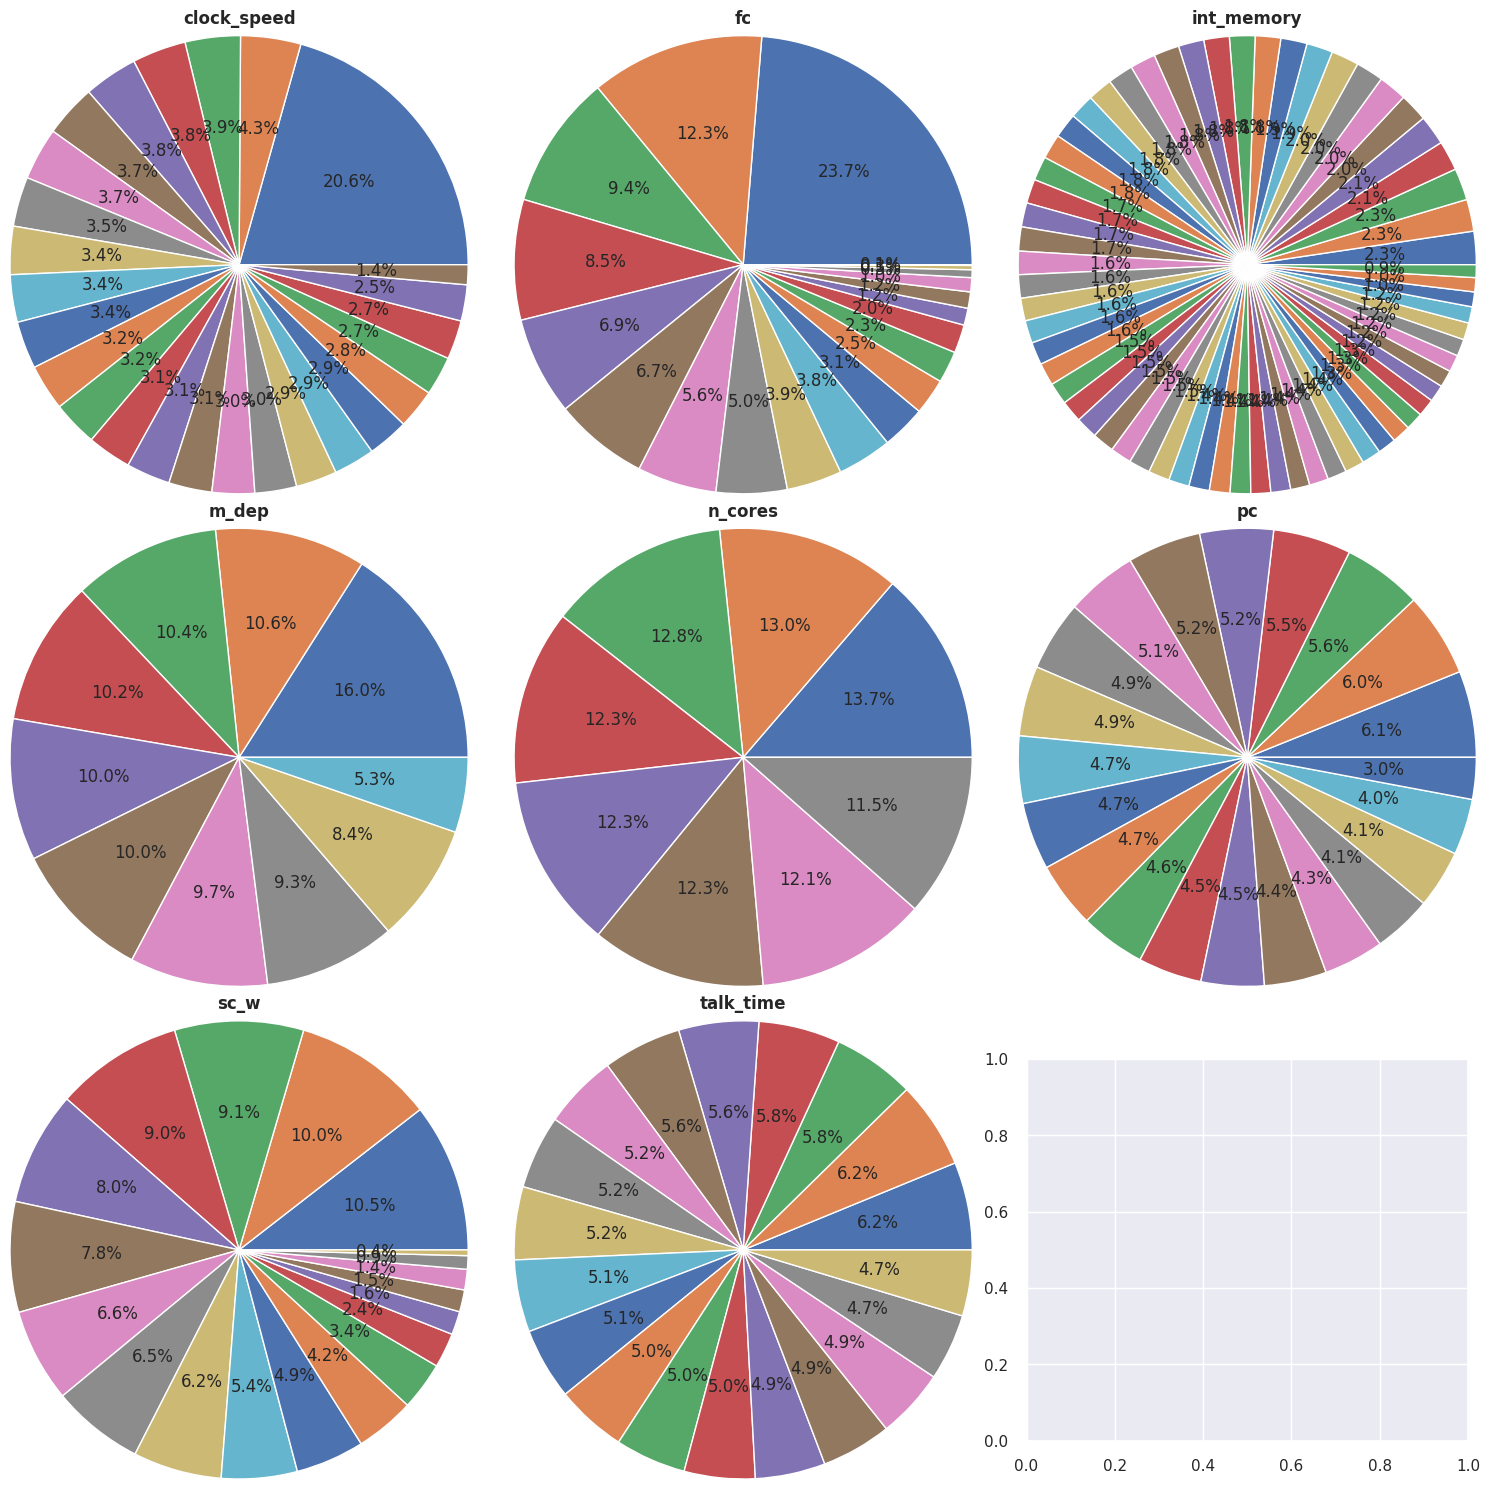

In [43]:
import matplotlib.pyplot as plt

# Select specific columns for analysis
columns = ['clock_speed', 'fc', 'int_memory', 'm_dep', 'n_cores', 'pc', 'sc_w', 'talk_time']

# Set the number of plots, rows, and columns
num_plots = len(columns)
num_rows = (num_plots - 1) // 3 + 1
num_cols = min(num_plots, 3)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate over the columns and create pie charts
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col] if num_rows > 1 else axs[col]

    value_counts = price_df[column].value_counts()
    ax.pie(value_counts, autopct="%.1f%%", radius=1.5)
    ax.set_title(f'{column}\n\n', weight='bold')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [44]:
# Chart - 6 visualization code

In [45]:
# Checking the counts of binary categorical variables by grouping price range
price_ranges = price_df.groupby(['price_range']).agg({
    'blue': 'value_counts',
    'dual_sim': 'value_counts',
    'four_g': 'value_counts',
    'three_g': 'value_counts',
    'touch_screen': 'value_counts',
    'wifi': 'value_counts'
})


blue  dual_sim  four_g  three_g  touch_screen  wifi
price_range                                                       
0           0   257       250     241      127           238   252
            1   243       250     259      373           262   248
1           0   255       245     238      122           239   248
            1   245       255     262      378           261   252
2           0   257       251     253      113           265   248
            1   243       249     247      387           235   252
3           1   259       265     275      385           248   262
            0   241       235     225      115           252   238

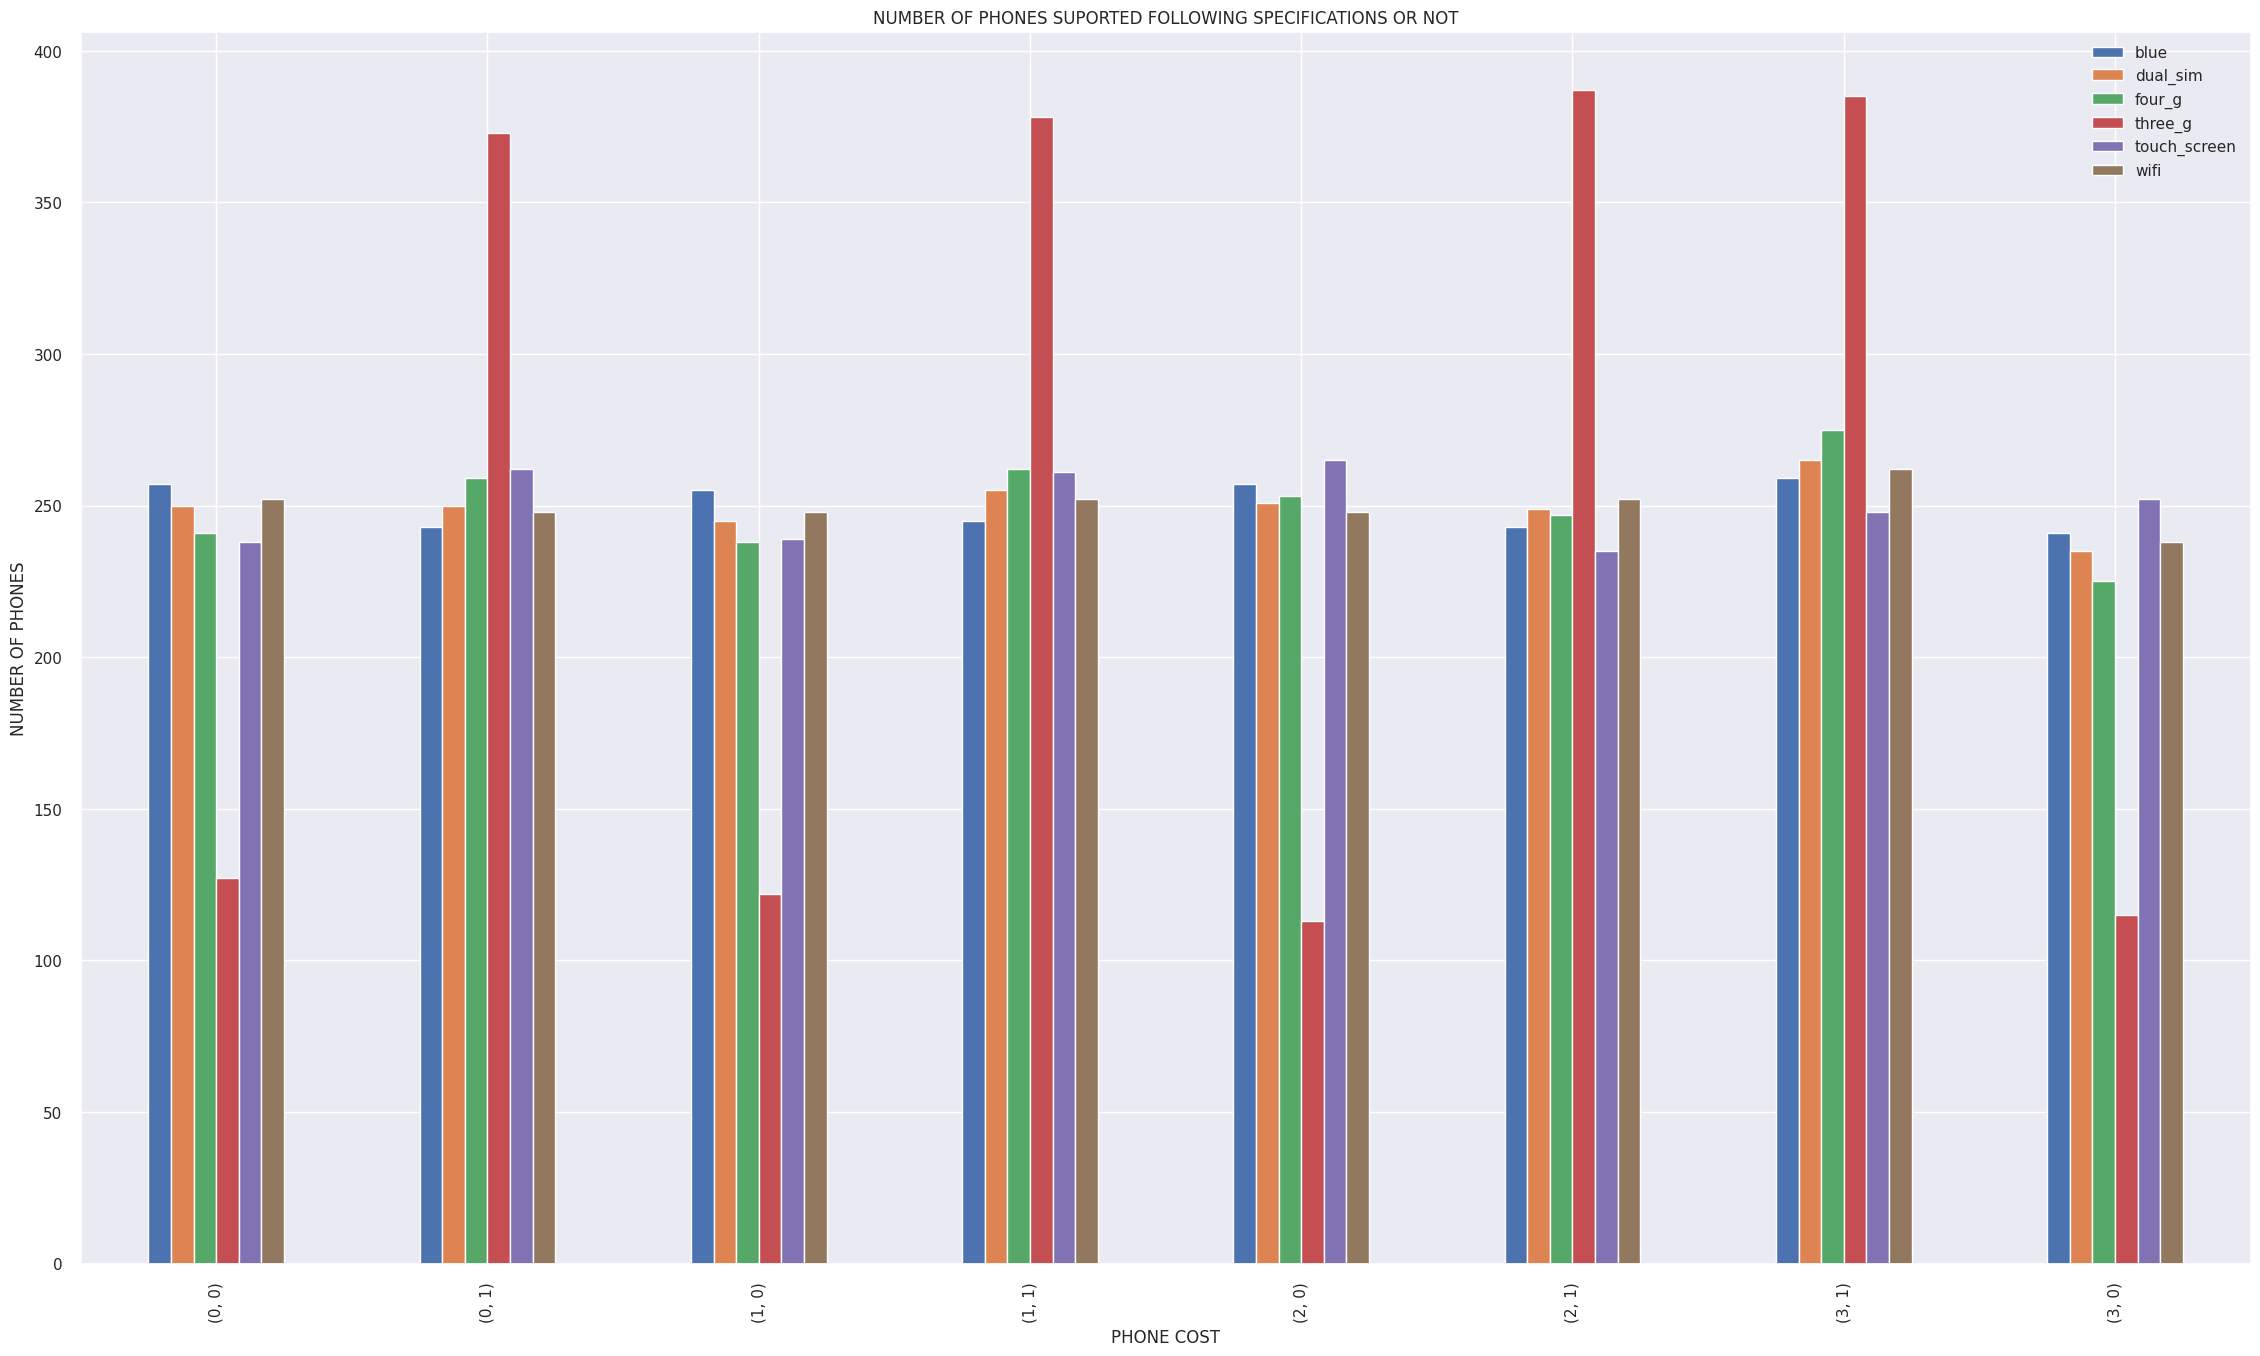

In [46]:

# plotting barplot to know that how much price get affected by following features
price_ranges.plot.bar(figsize=(28,16))
plt.title('NUMBER OF PHONES SUPORTED FOLLOWING SPECIFICATIONS OR NOT')
plt.xlabel('PHONE COST')
plt.ylabel('NUMBER OF PHONES')
price_ranges
     

SO BY ABOVE OBSERVATION WE FIND THAT EVERY PRICE CATEGORY HAVE ALMOST EQUAL NUMBER OF PHONES HAVE FEATURES OR NOT

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [47]:
# Chart - 7 visualization code

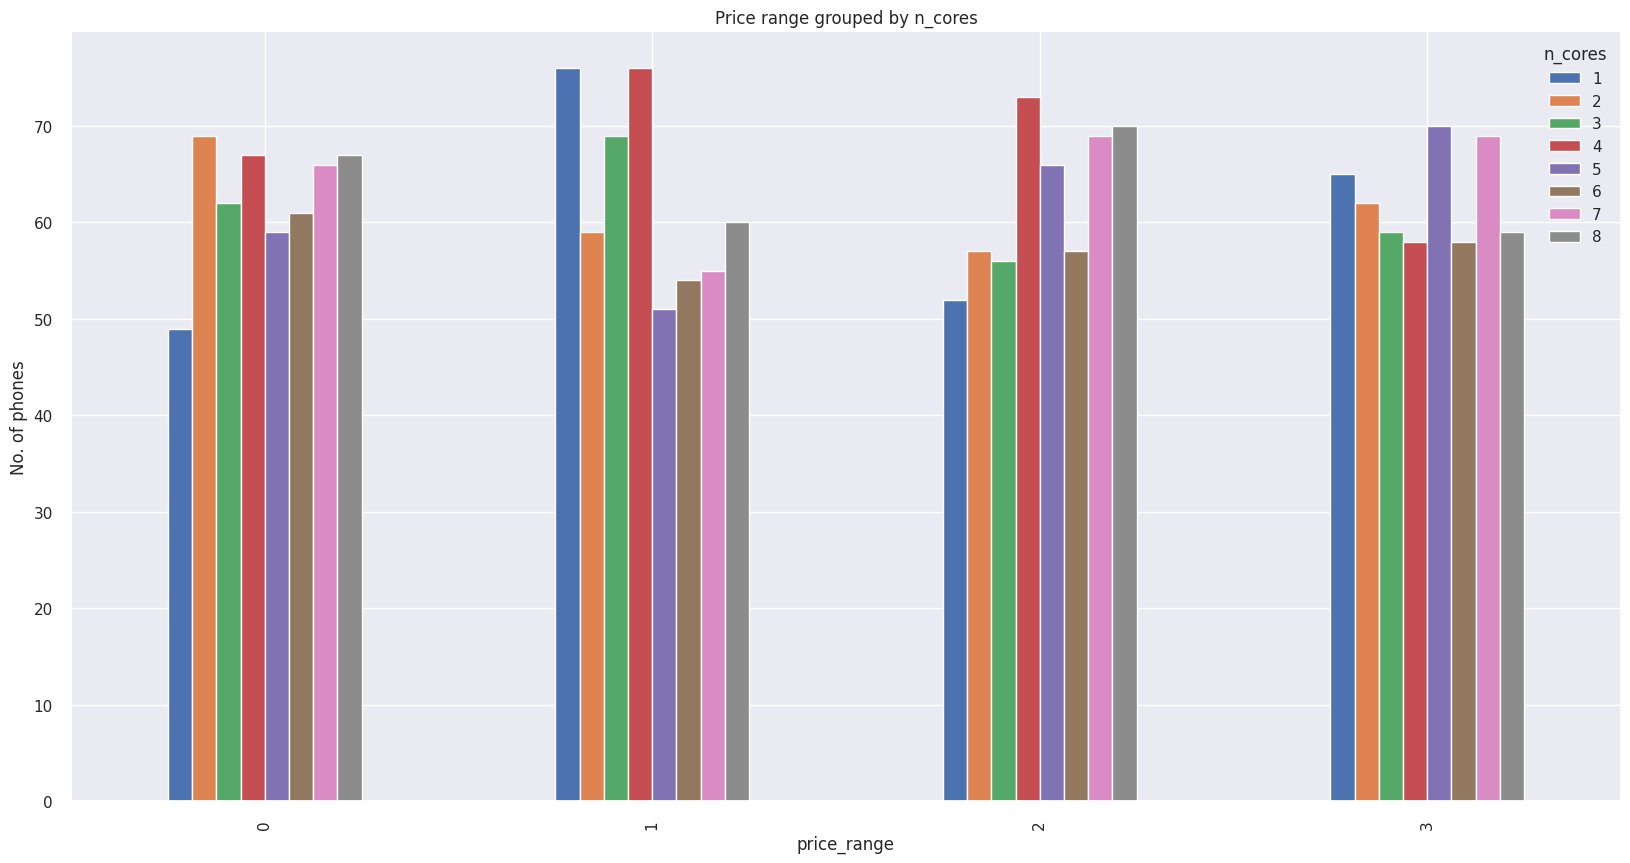

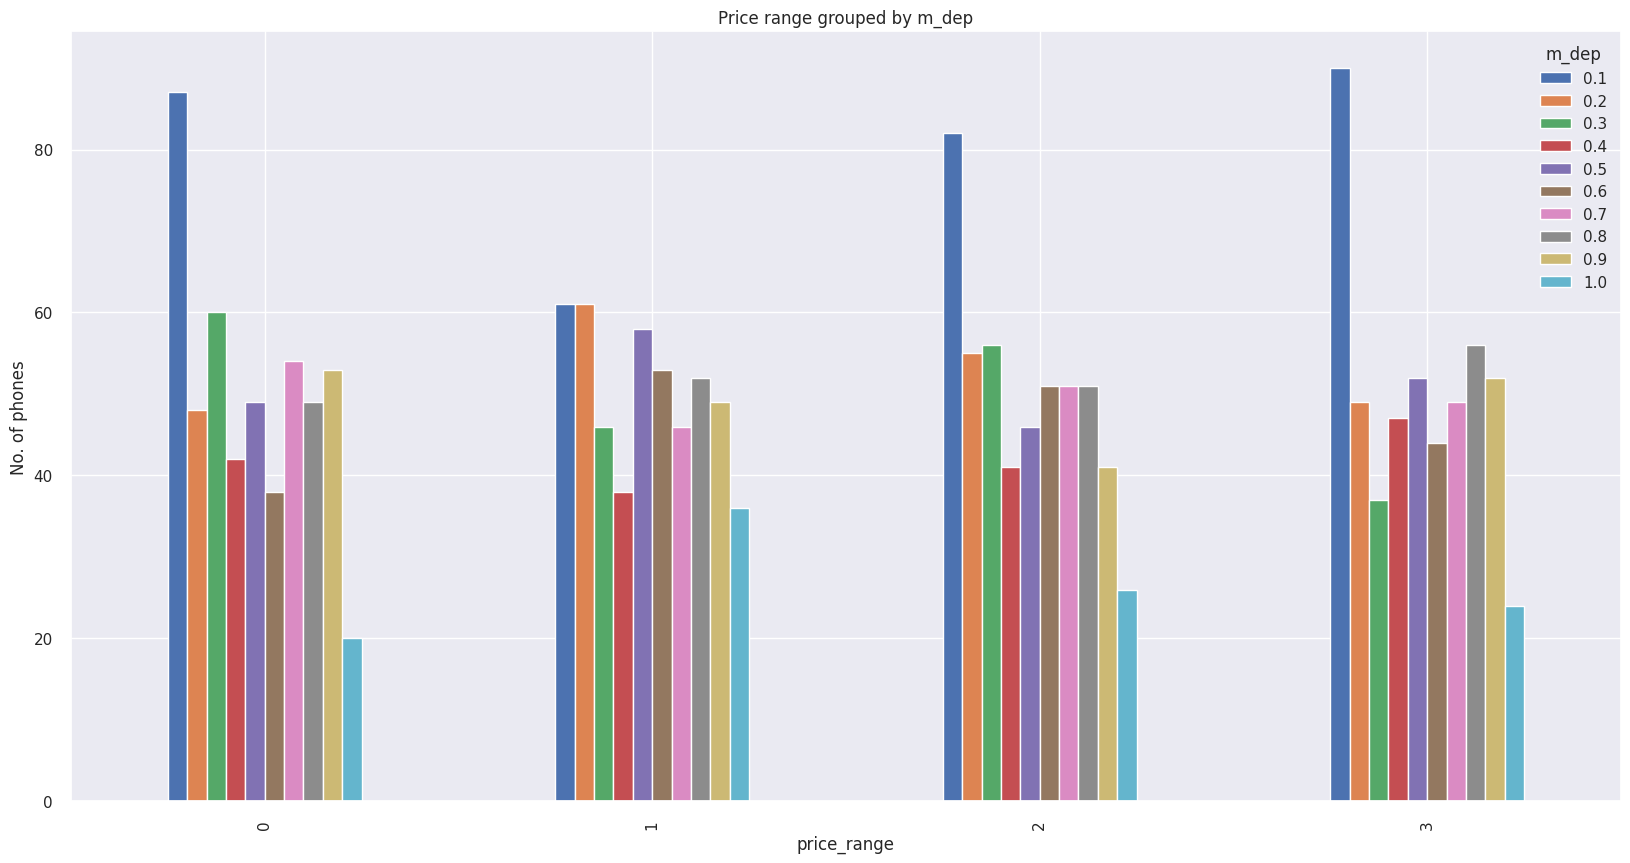

In [48]:
# Cores wise cost of mobile phone
specs=['n_cores','m_dep']
for item in specs:
  price_df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(20,10))
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

SO BY ABOVE GRAPHS WE CAN CLEARLY SAY THAT LESS THICK PHONES ARE HIGH COMPARING TO HIGH THCKNESS AND MAXIMUMUM MOBILES IN PRICE RANGE 2 & 3 HAVE MORE NO OF CORES.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [49]:
# Chart - 8 visualization code

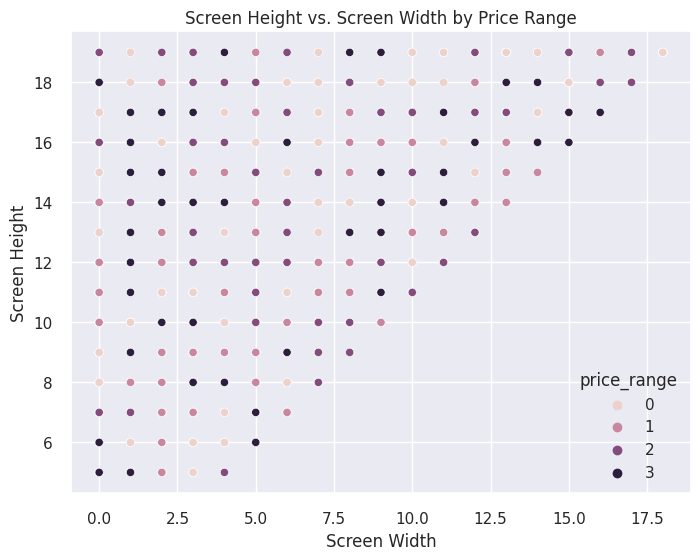

Correlation between Screen Height, Screen Width, and Price Range:
                 sc_h      sc_w  price_range
sc_h         1.000000  0.506144     0.022986
sc_w         0.506144  1.000000     0.038711
price_range  0.022986  0.038711     1.000000


In [50]:
# Scatter plot of screen height and screen width with price range
plt.figure(figsize=(8, 6))
sns.scatterplot(data=price_df1, x='sc_w', y='sc_h', hue='price_range')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.title('Screen Height vs. Screen Width by Price Range')
plt.show()

# Correlation between screen height, screen width, and price range
corr_sc = price_df1[['sc_h', 'sc_w', 'price_range']].corr()
print('Correlation between Screen Height, Screen Width, and Price Range:')
print(corr_sc)


##### 1. Why did you pick the specific chart?

How do the screen height (sc_h) and screen width (sc_w) relate to the price range? Is there any correlation between these features and the target variable?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [51]:
# Chart - 9 visualization code

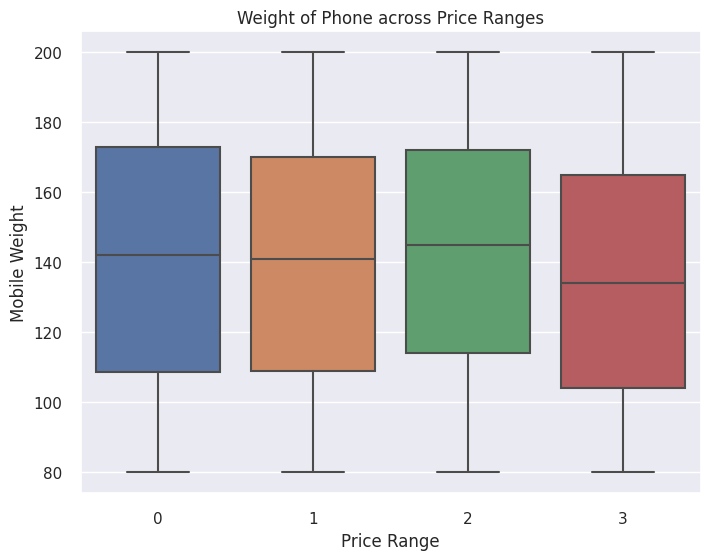

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=price_df1, x='price_range', y='mobile_wt')
plt.xlabel('Price Range')
plt.ylabel('Mobile Weight')
plt.title('Weight of Phone across Price Ranges')
plt.show()


##### 1. Why did you pick the specific chart?

How does the weight of the phone (mobile_wt) vary across different price ranges? Are there any significant differences?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [53]:
# Chart - 10 visualization code

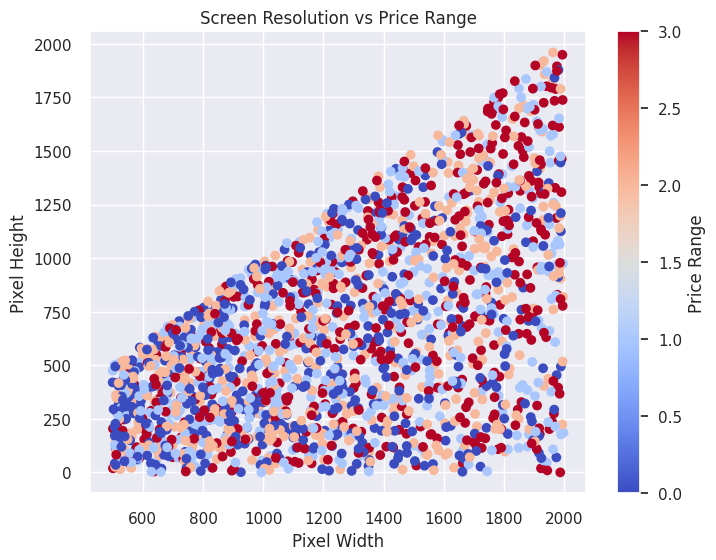

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(price_df1['px_width'], price_df1['px_height'], c=price_df1['price_range'], cmap='coolwarm')
plt.colorbar(label='Price Range')
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.title('Screen Resolution vs Price Range')
plt.show()


##### 1. Why did you pick the specific chart?

Are phones with higher screen resolutions (px_height and px_width) generally associated with higher price ranges? code for this

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [55]:
# Chart - 11 visualization code

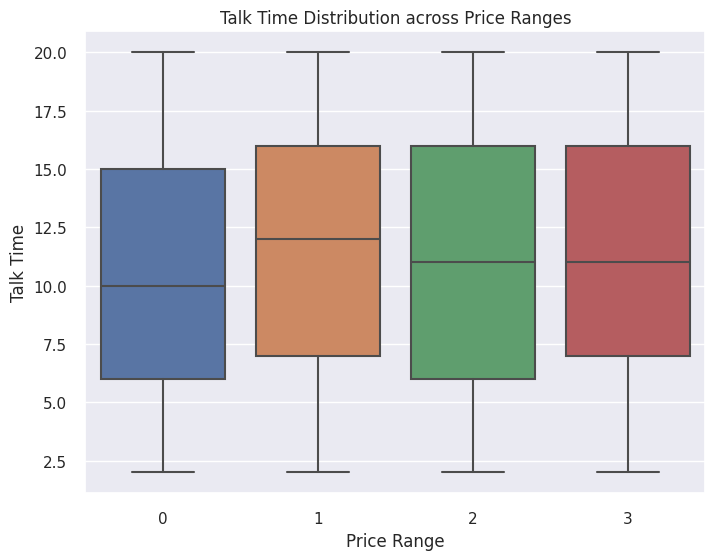

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='price_range', y='talk_time', data=price_df)
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.title('Talk Time Distribution across Price Ranges')
plt.show()


##### 1. Why did you pick the specific chart?

What is the distribution of talk time across different price ranges? Are there any noticeable differences?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [57]:
# Chart - 12 visualization code

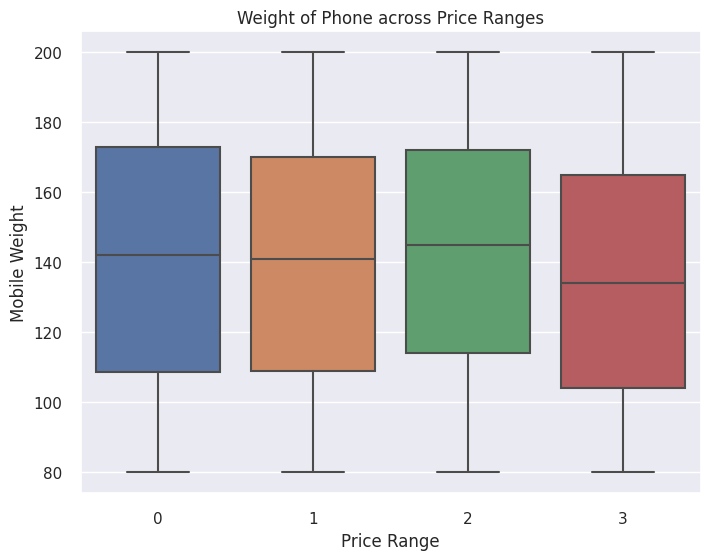

In [58]:


plt.figure(figsize=(8, 6))
sns.boxplot(data=price_df1, x='price_range', y='mobile_wt')
plt.xlabel('Price Range')
plt.ylabel('Mobile Weight')
plt.title('Weight of Phone across Price Ranges')
plt.show()


##### 1. Why did you pick the specific chart?

Does the presence of certain features, such as 4G, dual SIM support, or a touch screen, have a significant impact on the price range?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [59]:
# Chart - 13 visualization code

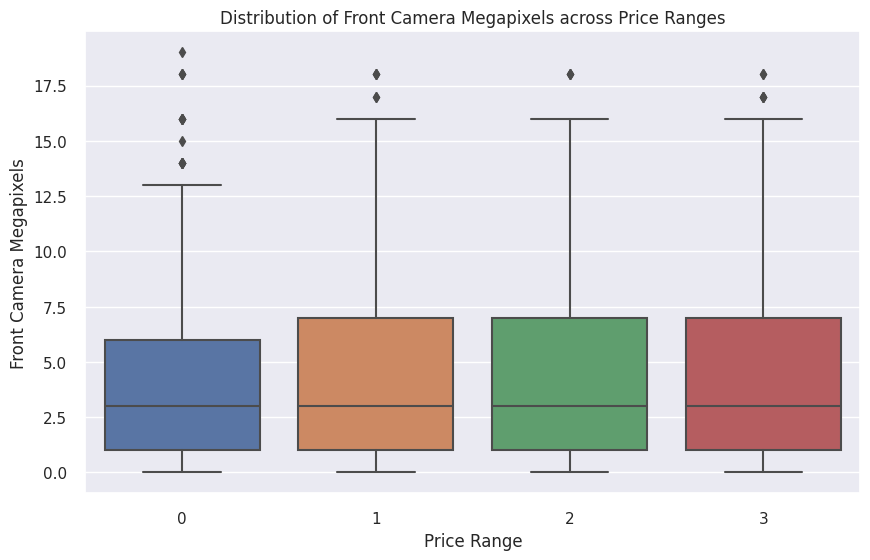

In [60]:
#Create a box plot to visualize the distribution of front camera megapixels across price ranges
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_df, x='price_range', y='fc')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Distribution of Front Camera Megapixels across Price Ranges')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [61]:
# Correlation Heatmap visualization code

In [62]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

NameError: ignored

<Figure size 2000x1000 with 0 Axes>

In [ ]:
corr_matrix = price_df.corr()
# Extract the correlation values for the price range feature
price_corr = corr_matrix['price_range']

# Sort the correlation values in descending order
sorted_corr = price_corr.abs().sort_values(ascending=False)

# Print the features with the strongest correlation to the price range
strongest_corr_features = sorted_corr.index[1:]  # Exclude the price range itself
print("Features with the strongest correlation to the price range:")
print(strongest_corr_features)

In [ ]:
corr.unstack().sort_values(kind='quicksort', na_position='first').drop_duplicates(keep='last')

In [ ]:
corr.abs()['price_range'].sort_values(ascending=False)

The highest correlations to our target variable (price_range) are:

1. ram
2. battery_power
3. px_width
4. px_height

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
price_df.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:

plt.figure(figsize=(20,7))
sns.boxplot(price_df)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features', size=14)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
corr = price_df.corr()
corr.style.background_gradient(cmap='ocean')

##### Feature selection

In [ ]:
def calc_vif(price_df):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = price_df.columns
   vif["VIF"] = [variance_inflation_factor(price_df.values, i) for i in range(price_df.shape[1])]
 
   return(vif)

In [ ]:
price_df.columns

In [ ]:
calc_vif(price_df[[i for i in price_df.describe().columns if i not in ['price_range','mobile_wt','px_width','sc_h']]])

In [ ]:
price_df.drop(['mobile_wt','px_width','sc_h'], axis = 1, inplace = True)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(price_df))

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [ ]:
y = price_df['price_range']
x = price_df.drop(columns = 'price_range')

# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
price_df1['price_range'].value_counts()

There is no need to handle imbalanced data

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr= LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
score=lr.score(x_test,y_test)
print(f'Logistic regression score : {score}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
y_pred = lr.predict(x_test)
report_lR = classification_report(y_test, y_pred)
print(report_lR)
cm = confusion_matrix(y_test,y_pred,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,y_pred)*100,2)}%\n')


In [ ]:
viz = PrecisionRecallCurve(LogisticRegression(random_state=42),ap_score=True,iso_f1_curves=True,fig=plt.figure(figsize=(7,5)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();

In [ ]:
from yellowbrick.classifier import ClassPredictionError
viz = ClassPredictionError(LogisticRegression(random_state=42),fig=plt.figure(figsize=(9,6)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();


In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
ax = sns.heatmap(cf_matrix, annot=True, cmap='bone')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross validation
logistic = LogisticRegression()

scores = cross_val_score(lr, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
score=rf.score(x_test,y_test)
print(f'Random Forest score : {score}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pred_value = rf.predict(x_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')
print(f'\nBalanced_Accuracy score % of the model is {round(balanced_accuracy_score(y_test,pred_value)*100,2)}%\n')

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_value)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
target = label_binarize(y,
                        classes=[0, 1, 2, 3])
target[:5]

In [ ]:
train_X, test_X,\
    train_y, test_y = train_test_split(x,
                                       target,
                                       test_size=0.25,
                                       random_state=42)
 
model_1 = RandomForestClassifier(random_state=0)\
    .fit(train_X, train_y[:, 0])
model_2 = RandomForestClassifier(random_state=0)\
    .fit(train_X, train_y[:, 1])
model_3 = RandomForestClassifier(random_state=0)\
    .fit(train_X, train_y[:, 2])
model_4 = RandomForestClassifier(random_state=0)\
    .fit(train_X, train_y[:, 3])
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(test_X, test_y[:, 0])}")
print(f"model 2 - {model_2.score(test_X, test_y[:, 1])}")
print(f"model 3 - {model_3.score(test_X, test_y[:, 2])}")
print(f"model 4 - {model_3.score(test_X, test_y[:, 3])}")

In [ ]:
model = OneVsRestClassifier(RandomForestClassifier(random_state=42))\
    .fit(train_X, train_y)
prob_test_vec = model.predict_proba(test_X)
 
n_classes = 4
fpr = [0] * 4
tpr = [0] * 4
thresholds = [0] * 4
auc_score = [0] * 4
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score


In [ ]:
sum(auc_score) / n_classes

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        test_y[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {[class_id]}",
        color=color,
        ax=ax,
    )

In [ ]:
from yellowbrick.classifier import ClassPredictionError
viz = ClassPredictionError(RandomForestClassifier(random_state=42),fig=plt.figure(figsize=(9,6)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(x, y)
     

In [ ]:
#getting best parameter from grid search:
clsr.best_params_

In [ ]:
#assigning best param variable:
rf_grid_best = clsr.best_estimator_

In [ ]:
#model evaluation:

rf_pred_value = rf_grid_best.predict(x_test)

print(metrics.classification_report(y_test,rf_pred_value))
cm = confusion_matrix(y_test,rf_pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,rf_pred_value)*100,2)}%\n')

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_value)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
viz = ClassPredictionError(RandomForestClassifier(random_state=42),fig=plt.figure(figsize=(9,6)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
score=model.score(x_test,y_test)
print(f'XGBClassifier score : {score}')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
pred_value = xgb.predict(x_test)
print(metrics.classification_report(y_test,pred_value))
cm = confusion_matrix(y_test,pred_value,labels=[1,0])
print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,pred_value)*100,2)}%\n')

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_value)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
viz = ClassPredictionError(XGBClassifier(random_state=42),fig=plt.figure(figsize=(9,6)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();

In [ ]:
train_X, test_X,\
    train_y, test_y = train_test_split(x,
                                       target,
                                       test_size=0.25,
                                       random_state=42)
 
model_1 = XGBClassifier(random_state=42)\
    .fit(train_X, train_y[:, 0])
model_2 = XGBClassifier(random_state=42)\
    .fit(train_X, train_y[:, 1])
model_3 = XGBClassifier(random_state=42)\
    .fit(train_X, train_y[:, 2])
model_4 = XGBClassifier(random_state=42)\
    .fit(train_X, train_y[:, 3])
print(f"Model Accuracy :")
print(f"model 1 - {model_1.score(test_X, test_y[:, 0])}")
print(f"model 2 - {model_2.score(test_X, test_y[:, 1])}")
print(f"model 3 - {model_3.score(test_X, test_y[:, 2])}")
print(f"model 4 - {model_3.score(test_X, test_y[:, 3])}")

In [ ]:
model = OneVsRestClassifier(XGBClassifier(random_state=42))\
    .fit(train_X, train_y)
prob_test_vec = xgb.predict_proba(test_X)
 
n_classes = 4
fpr = [0] * 4
tpr = [0] * 4
thresholds = [0] * 4
auc_score = [0] * 4
 
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(test_y[:, i],
                                              prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
 
auc_score


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        test_y[:, class_id],
        prob_test_vec[:, class_id],
        name=f"ROC curve for {[class_id]}",
        color=color,
        ax=ax,
    )

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
grid = GridSearchCV(model, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(x_train,y_train)

In [ ]:
#getting best parameter from grid search:
grid.best_params_

In [ ]:
#assigning best param variable:
xgb_grid_best = grid.best_estimator_

In [ ]:
#model evaluation:

xgb_pred_value = xgb_grid_best.predict(x_test)

print(metrics.classification_report(y_test,xgb_pred_value))
cm = confusion_matrix(y_test,rf_pred_value,labels=[1,0])

print(f'\nAccuracy score % of the model is {round(accuracy_score(y_test,rf_pred_value)*100,2)}%\n')

In [ ]:
cf_matrix = confusion_matrix(y_test, xgb_pred_value)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
viz = ClassPredictionError(grid,fig=plt.figure(figsize=(9,6)))
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show();

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
## Defining our base model
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
## Initialize JavaScript visualizations in notebook environment
def get_shap_js(model):
  shap.initjs()
# Define a tree explainer for the built model
  explainer = shap.TreeExplainer(rf)
# obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(x_test.iloc[0])
  return shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 

In [ ]:
#creating function to get shap summary in scatter plot
def shap_scatter_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(x_test)
  return shap.summary_plot(shap_values[0], x_test)

In [ ]:
#creating function to get shap summary in bar plot
def shap_bar_plot(model):
  shap_values = shap.TreeExplainer(model).shap_values(x_test)  
  return shap.summary_plot(shap_values, x_train, plot_type="bar")

In [ ]:
get_shap_js(rf_grid_best)

In [ ]:
shap_scatter_plot(rf_grid_best)
shap_bar_plot(rf_grid_best)

Shap for xgb

In [ ]:
get_shap_js(xgb)

In [ ]:
shap_scatter_plot(xgb)
shap_bar_plot(xgb)

Xgb using grid

In [ ]:
get_shap_js(grid)

Shap for lr

In [ ]:
get_shap_js(lr)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***